In [118]:
import numpy as np
import pandas as pd
import scipy.fft
import scipy.fft as sc
import matplotlib.pyplot as plt
import pandas

In [119]:
"sx - сигнал, hx - передаточная функция"
df = pd.read_csv('sig07.dat',sep='  ', names=['x','sx','hx'])
df.head()

<ipython-input-119-4e006de8c274>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('sig07.dat',sep='  ', names=['x','sx','hx'])


,x,sx,hx
0,-16.000000,-0.079861,-0.0
1,-15.996094,0.010090,-0.0
2,-15.992188,-0.141093,-0.0
3,-15.988281,-0.046915,-0.0
4,-15.984375,0.133125,-0.0


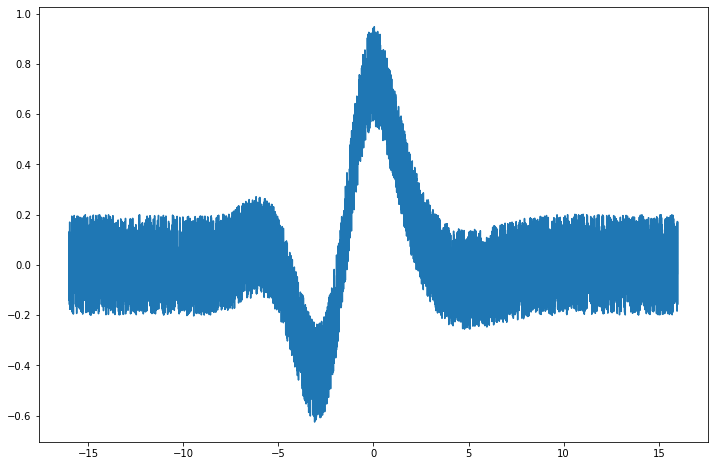

In [120]:
x = np.array(df['x'])
y = np.array(df['sx'])
n = 1
plt.figure(figsize=(12,8))
plt.plot(df['x'][::n],df['sx'][::n])
df['x'] = df['x']

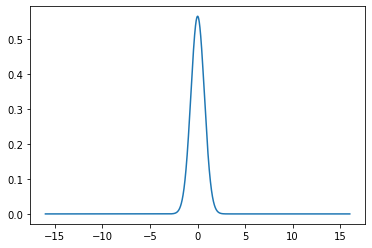

In [121]:
plt.plot(df['x'],df['hx'])


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


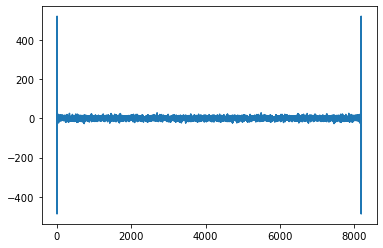

In [122]:
y1 = sc.fft(np.array(df['sx']))
plt.plot(y1)
y1 = sc.fftshift(np.abs(y1))

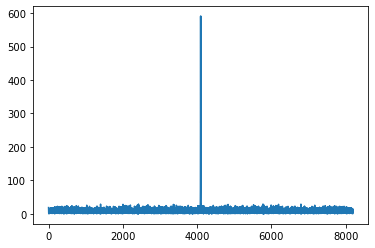

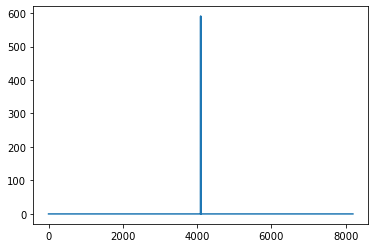

array([4092, 4100])

In [123]:
maxy1 = np.where(y1==y1.max())
maxy1
plt.plot(y1)
plt.show()
y1[np.where(y1!=y1.max())] = 0
plt.plot(y1)
plt.show()
ind1 = np.nonzero(y1)[0]
ind1

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


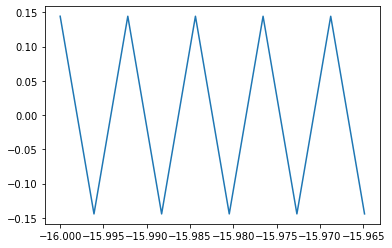

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


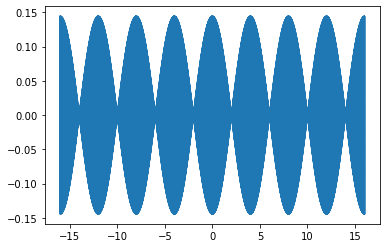

In [124]:
new_sig1 = sc.ifft(y1)
plt.plot(df['x'][:10],new_sig1[:10])
plt.show()
plt.plot(df['x'],new_sig1)

In [125]:

y2 = sc.rfft(np.array(df['sx']))
x2 = sc.rfftfreq(df.index.stop)

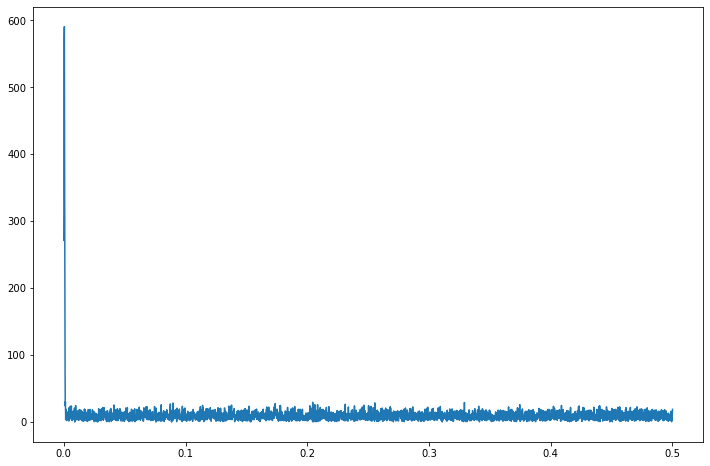

In [126]:
plt.figure(figsize=(12,8))

plt.plot(x2,np.abs(y2))

In [127]:

df.head(-1)

,x,sx,hx
0,-16.000000,-0.079861,-0.0
1,-15.996094,0.010090,-0.0
2,-15.992188,-0.141093,-0.0
3,-15.988281,-0.046915,-0.0
4,-15.984375,0.133125,-0.0
...,...,...,...
8186,15.976563,0.172827,0.0
8187,15.980469,0.084756,0.0
8188,15.984375,-0.120840,0.0
8189,15.988281,-0.157474,0.0


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


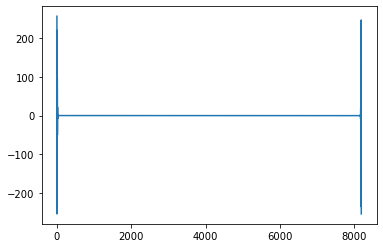

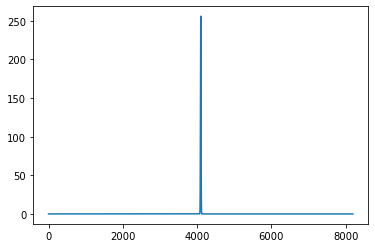

In [128]:

fh = sc.fft(np.array(df['hx']))
plt.plot(fh)
plt.show()
fh = sc.fftshift(np.abs(fh))
plt.plot(fh)
plt.show()

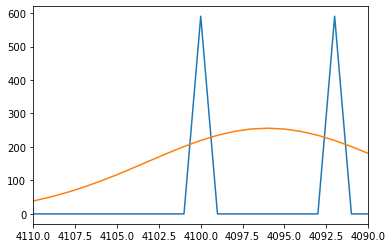

In [129]:
plt.plot(y1)
plt.plot(fh)
plt.xlim(right=ind1[1]-10,left=ind1[-1]+10)
plt.show()

In [130]:
find = y1 - fh

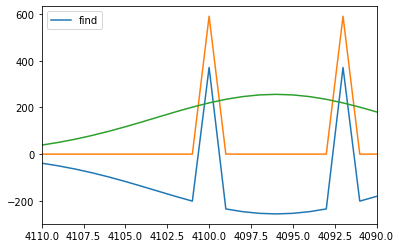

In [131]:
plt.plot(find,label='find')
plt.plot(y1)
plt.plot(fh)
plt.xlim(right=ind1[1]-10,left=ind1[-1]+10)
plt.legend()
plt.show()

In [132]:
df['sx'][:100]

0    -0.079861
1     0.010090
2    -0.141093
3    -0.046915
4     0.133125
        ...   
95   -0.101524
96    0.087617
97   -0.165192
98    0.011701
99   -0.148852
Name: sx, Length: 100, dtype: float64

In [133]:
df['sx'][:100].std()

0.11541357222102623

In [134]:
df['x'][:100]

0    -16.000000
1    -15.996094
2    -15.992188
3    -15.988281
4    -15.984375
        ...    
95   -15.628906
96   -15.625000
97   -15.621094
98   -15.617188
99   -15.613281
Name: x, Length: 100, dtype: float64

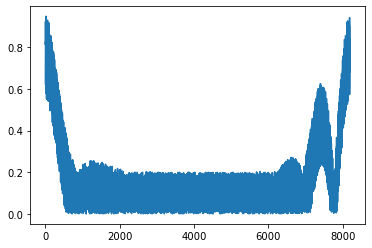

In [135]:
y2 = sc.fftshift(np.array(df['sx']))
plt.plot(np.abs(y2))
y2 = sc.fftshift(np.abs(y2))

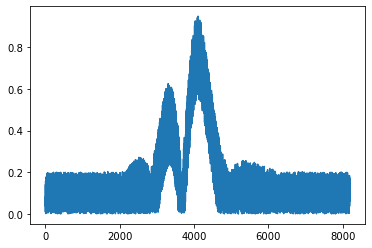

[3305]
[408]
(array([4108]),)


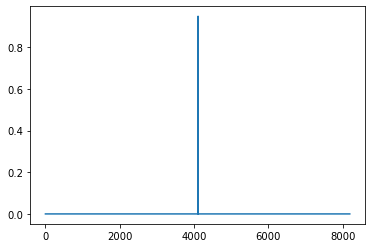

In [136]:
plt.plot(y2)
plt.show()
ind21 = np.where(y2[:3700]==y2[:3700].max())[0]
ind22 = np.where(y2[3700:]==y2[3700:].max())[0]
y2[:],y2[ind21],y2[3700+ind22] = 0, 0, y2[ind22+3700]
print(ind21)
print(ind22)
print(np.nonzero(y2))
plt.plot(y2)
plt.show()

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


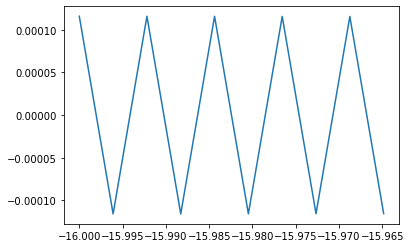

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


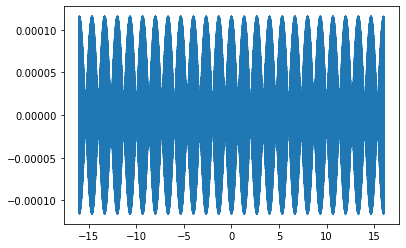

In [137]:
new_sig2 = sc.ifft(y2)
plt.plot(df['x'][:10],new_sig2[:10])
plt.show()
plt.plot(df['x'],new_sig2)

# plt.plot(df['x'][:10],new_sig1[:10])

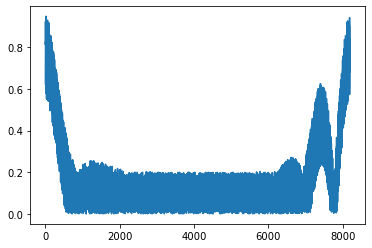

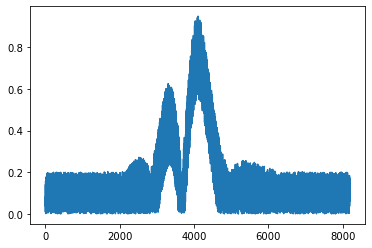

[3305]
[408]


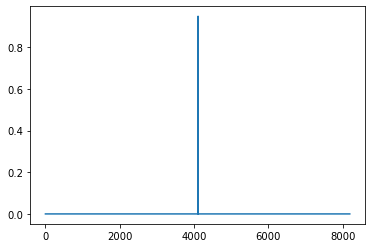

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


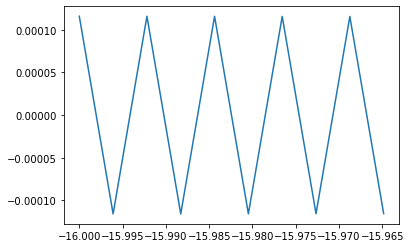

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


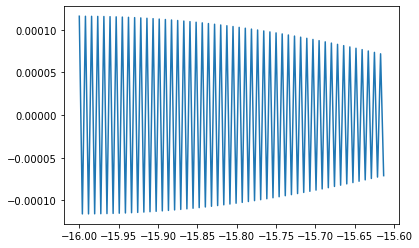

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


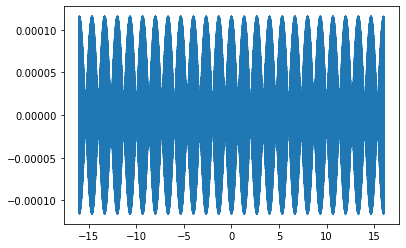

In [138]:
y3 = sc.fftshift(np.array(df['sx']))
plt.plot(np.abs(y3))
plt.show()
y3 = sc.fftshift(np.abs(y3))
plt.plot(y3)
plt.show()
ind21 = np.where(y3[:3700]==y3[:3700].max())[0]
ind22 = np.where(y3[3700:]==y3[3700:].max())[0]
y3[:],y3[ind21],y3[3700+ind22] = 0, 0, y3[ind22+3700]
print(ind21)
print(ind22)
plt.plot(y3)
plt.show()
new_sig3 = sc.ifft(y3)
plt.plot(df['x'][:10],new_sig3[:10])
plt.show()
plt.plot(df['x'][:100],new_sig3[:100])
plt.show()
plt.plot(df['x'],new_sig3)
plt.show()



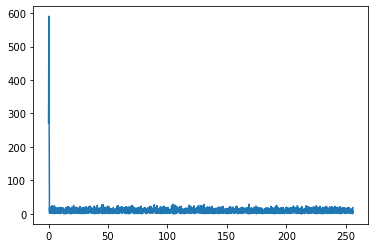

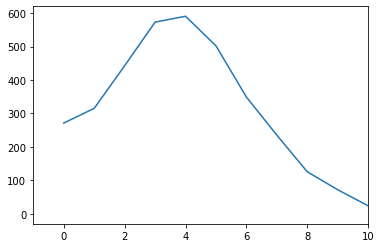

4


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


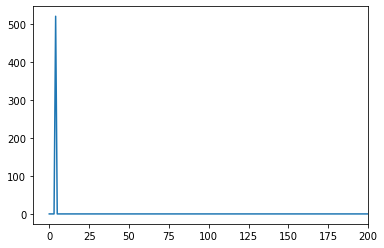

(array([4]),)


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([32]),)


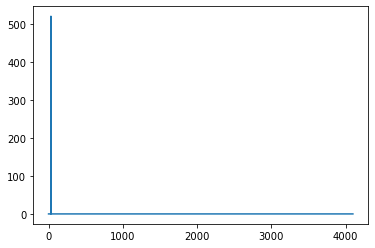

In [167]:

yf = sc.rfft(np.array(df['sx']))
xf = sc.rfftfreq(8192,1/1024)
plt.plot(xf,np.abs(yf))
# yf[0] = 0
plt.show()
plt.plot(np.abs(yf))
plt.xlim(left=-1 ,right=10)
plt.show()
idx = np.where(np.abs(yf)==np.abs(yf).max())[0][0]
print(idx)
yf[:idx] = 0
yf[idx+1:] = 0
plt.xlim(left=-10 ,right=200)
plt.plot(yf)
plt.show()

print(np.nonzero(yf))
yf[idx-idx+32] = yf[idx]
yf[:idx+1] = 0
plt.plot(yf)
print(np.nonzero(yf))

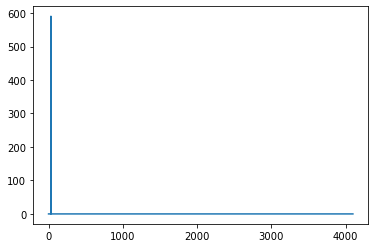

In [168]:

plt.plot(np.abs(yf))
# plt.xlim(left=-10 ,right=200)
plt.show()

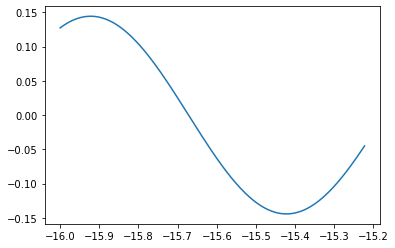

In [169]:
s = scipy.fft.irfft(yf)
plt.plot(x[:200],s[:200])
# plt.plot(x[:200],y[:200])

In [170]:
plt.figure(figsize=(18,12))
s = scipy.fft.irfft(yf)
dw1 = 1/np.max(s)
s *= 1/np.max(s)
# plt.plot(x,y)

<Figure size 1296x864 with 0 Axes>

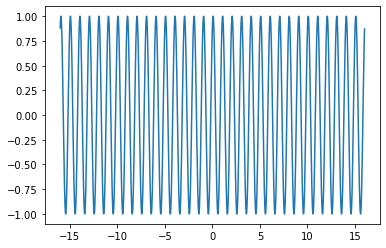

In [171]:
plt.plot(x,s)

In [172]:
dw1

6.937582853478164

In [173]:
xf[2] - xf[3]

-0.0625